In [2]:
import numpy as np
import pandas as pd
import matplotlib
print(matplotlib.__version__)
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
from glob import glob
from collections import Counter
import ns
import history_cmc as hic
import math
import scipy
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
import random
from random import shuffle
import ecc_calc as gwcalc
import unit_convert as uc
import merger_rate_calculator as mr
import ns_tidalcapture as tc
import psr_catalog as pc


%matplotlib inline

matplotlib.rcParams.update({'font.size': 24})
      
twopi=2.*np.pi
yearsc=3.1557*10**7
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
AU=1.496*10**13  ##cm
PC=3.086*10**18  ##cm

savepath='/projects/b1095/syr904/projects/PULSAR2/tc_comparison/'

2.1.2


157
157 157
['0.00031', '0.07056', '<0.0004', '<0.00004', '<0.00016', '0.0', '0.00008', '0.0', '0.00039', '0.00040', '0.00014', '0.0', '0.0', '0.0000005', '0.000003', '0.88798', '<0.01', '0.0', '0.0', '0.0753', '0.13784', '0.0', '0.0', '0.0', '0.0', '0.02532', '0.000002', '0.00057', '0.00012', '0.0', '0.000004', '<0.00007', '<0.00006', '0.00045', '0.0', '0.0', '-', '<0.005', '<0.0001', '0.0', '0.02', '0.428', '0.350', '0', '0.000045', '0', '0', '0.722', '0.60498', '0', '0.015', '0.3024', '0', '0.7608', '0', '0', '0.4400', '0.20475', '0.57016', '0.00', '0.0531', '0.71243', '0.00404', '0.038', '0.21206', '0.0', '0.74703', '0.847', '0.776', '0.0', '0.0', '0.0', '0.0', '0.00152', '0.0', '0.0', '0.0', '<0.00001', '<0.00013', '0.0', '0.68139', '<0.00012', '>0.52']


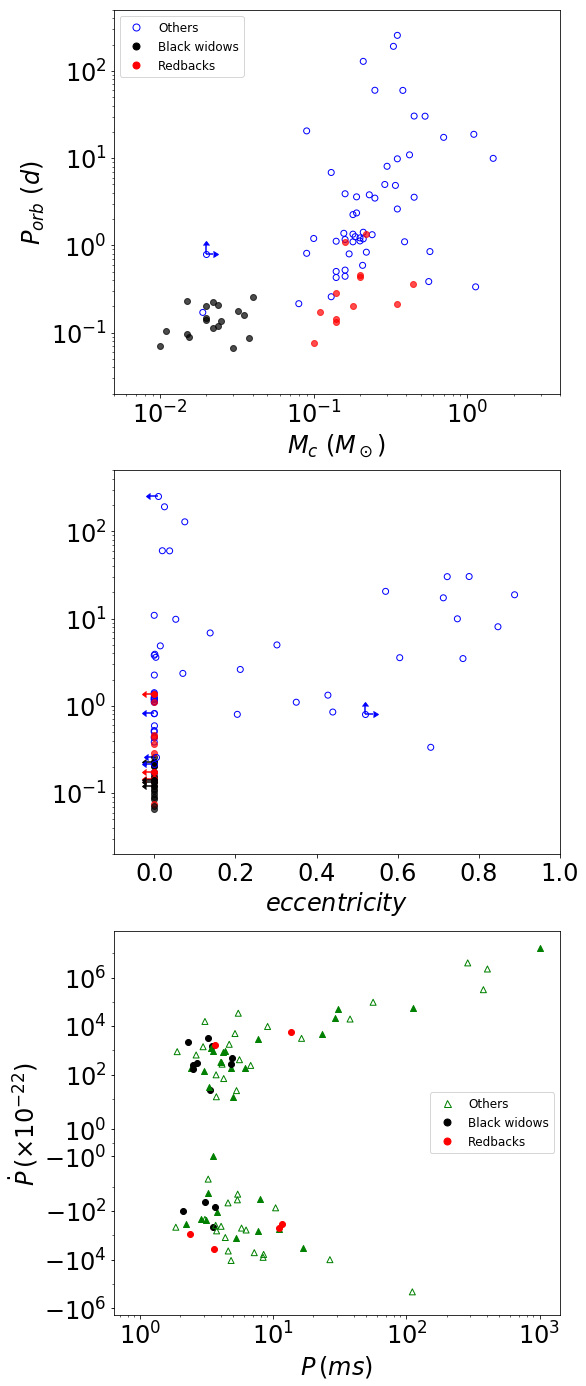

In [7]:
P, Pdot, Binflag, Namespin, Period, Ecc, Mc, Names, Pall, Bfall, Nameall = pc.readdata_freire()
print(len(Pall), len(Bfall))
print(Ecc)
datarb=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/GCredback.dat', dtype=str)
databw=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/GCblackwidow.dat', dtype=str)
namerb=datarb[:,0]; namebw=databw[:,0]

plt.rcParams['figure.figsize'] = [8,24]
rdot=mlines.Line2D([], [],  linestyle = 'None', color='r', marker='o',
                  markersize=7, label='Redbacks')
kdot=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='o',
                  markersize=7, label='Black widows')
bdot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='o',
                  markersize=7, markerfacecolor='none', label='Others')
gtri=mlines.Line2D([], [],  linestyle = 'None', color='g', marker='^',
                  markersize=7, markerfacecolor='none', label='Others')

fig, axs = plt.subplots(nrows=3, sharey=False)
fig.subplots_adjust(wspace=0.05)
for i in range(len(Mc)):
    if Mc[i][0] != '>':
        if Names[i] in namerb:
            axs[0].scatter(float(Mc[i]), float(Period[i]), color='red', alpha=0.7, zorder=2)
            if Ecc[i][0]!='<' and Ecc[i][0]!='-':
                axs[1].scatter(float(Ecc[i]), float(Period[i]),  color='red', alpha=0.7, zorder=2)
            elif Ecc[i][0]!='-':
                axs[1].errorbar(float(Ecc[i].split('<')[1]), float(Period[i]), xerr=0.02, 
                                xuplims=True,  marker='o', color='red', linestyle='none')
                
            
        elif Names[i] in namebw:
            axs[0].scatter(float(Mc[i]), float(Period[i]), color='k', alpha=0.7, zorder=2)
            if Ecc[i][0]!='<':
                axs[1].scatter(float(Ecc[i]), float(Period[i]), color='k', alpha=0.7, zorder=2)
            else:
                axs[1].errorbar(float(Ecc[i].split('<')[1]), float(Period[i]), xerr=0.02, 
                                xuplims=True,  marker='o', color='k', linestyle='none')
                
            
        else:
            axs[0].scatter(float(Mc[i]), float(Period[i]), color='b', facecolors='none', zorder=1)
            if Ecc[i][0]!='<':
                axs[1].scatter(float(Ecc[i]), float(Period[i]), color='b', facecolors='none', zorder=1)
            else:
                #print(Ecc[i])
                axs[1].errorbar(float(Ecc[i].split('<')[1]), float(Period[i]), xerr=0.02, 
                                xuplims=True,  marker='o', markerfacecolor='none', color='b', linestyle='none')
                
    
    else:
        axs[0].errorbar(float(Mc[i].split('>')[1]), float(Period[i].split('>')[1]), xerr=0.002, yerr=0.2, lolims=True, 
                        xlolims=True, marker='o', markerfacecolor='none', color='b', linestyle='none')
        axs[1].errorbar(float(Ecc[i].split('>')[1]), float(Period[i].split('>')[1]), xerr=0.02, yerr=0.2, lolims=True, 
                        xlolims=True, marker='o', markerfacecolor='none', color='b', linestyle='none')
        

for j in range(len(P)):
    if Binflag[j]==0:
        axs[2].scatter(float(P[j]), float(Pdot[j])*10**22, marker='^', facecolor='none', color='g')
    else:
        if Namespin[j] in namerb:
            axs[2].scatter(float(P[j]), float(Pdot[j])*10**22, marker='o', color='r')
        elif Namespin[j] in namebw:
            axs[2].scatter(float(P[j]), float(Pdot[j])*10**22, marker='o', color='k')
        else:
            axs[2].scatter(float(P[j]), float(Pdot[j])*10**22, marker='^', color='g')
            
        
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_ylim(0.02, 500)
axs[0].set_xlim(0.005, 4)
axs[0].set_xlabel(r'$M_c\ (M_\odot)$')
axs[0].set_ylabel(r'$P_{orb}\ (d)$')
axs[0].legend(handles=[bdot, kdot, rdot], loc='upper left', prop={'size': 12}, numpoints=1, frameon=True)

axs[1].set_yscale('log')
#axs[1].set_xscale('symlog')
axs[1].set_ylim(0.02, 500)
axs[1].set_xlim(-0.1, 1)
axs[1].set_xlabel(r'$eccentricity$')
#axs[1].set_ylabel(r'$P_{orb}\ (d)$')

axs[2].set_yscale('symlog')
axs[2].set_xscale('log')
axs[2].legend(handles=[gtri, kdot, rdot], loc='center right', prop={'size': 12}, numpoints=1, frameon=True)
axs[2].set_xlabel(r'$P\,(ms)$')
axs[2].set_ylabel(r'$\dot{P}\,(\times 10^{-22})$')
axs[2].locator_params(numticks=8)
yticks =plt.gca().yaxis.get_major_ticks()
yticks[4].set_visible(False)

#plt.savefig('/projects/b1095/syr904/projects/PULSAR/period_mass.pdf')

156
151 151
1004.04
1.84538 405.934


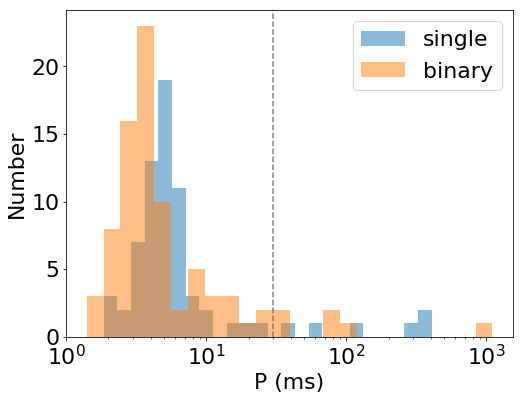

In [37]:
P, Pdot, Binflag, Namespin, Period, Ecc, Mc, Names, Pall, Bfall = pc.readdata_freire()
print(len(Pall), len(Bfall))
print(max(Pall))

Psin=[]; Pbin=[]
for i in range(len(Bfall)):
    if Bfall[i]==0:
        Psin.append(Pall[i])
    else:
        Pbin.append(Pall[i])

print(min(Psin), max(Psin))

plt.rcParams['figure.figsize'] = [8,6]
matplotlib.rcParams.update({'font.size': 22})
plt.hist(Psin, bins=np.logspace(np.log10(min(Psin)),np.log10(max(Psin)), 25), align='mid',
         alpha=0.5, label='single')
plt.hist(Pbin, bins=np.logspace(np.log10(min(Pbin)),np.log10(max(Pbin)+100), 25), align='mid',
         alpha=0.5, label='binary')
plt.axvline(x=30, ls='--', color='gray')

plt.xscale('log')
plt.xlabel('P (ms)')
plt.ylabel('Number')
plt.legend(loc='best')
plt.savefig('/projects/b1095/syr904/projects/PULSAR/spin_distri.pdf', dpi=300)

157
13 18
69 83 5


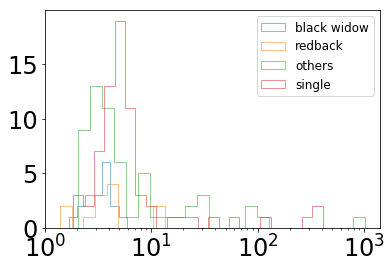

In [9]:
##Histogram of the spin distribution distinguishing redbacks and black widows
P, Pdot, Binflag, Namespin, Period, Ecc, Mc, Names, Pall, Bfall, Nameall = pc.readdata_freire()
datarb=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/GCredback.dat', dtype=str)
databw=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/GCblackwidow.dat', dtype=str)
namerb=datarb[:,0]; namebw=databw[:,0]

nsin=0; nbin=0; nundet=0
Pbw=[]; Prb=[]; Pother=[]; Psin=[]
for j in range(len(Pall)):
    if Bfall[j]==0:
        Psin.append(float(Pall[j]))
        nsin+=1
    elif Bfall[j]==1:
        nbin+=1
        if Nameall[j] in namerb:
            Prb.append(float(Pall[j]))
        elif Nameall[j] in namebw:
            Pbw.append(float(Pall[j]))
        else:
            Pother.append(float(Pall[j]))
    else:
        nundet+=1
        if Nameall[j] in namerb:
            Prb.append(float(Pall[j]))
        elif Nameall[j] in namebw:
            Pbw.append(float(Pall[j]))
        else:
            Pother.append(float(Pall[j]))
        
        
print(len(Prb), len(Pbw))
print(nsin, nbin, nundet)

plt.figure()
plt.hist(Pbw, bins=np.logspace(np.log10(min(Pbw)),np.log10(max(Pbw)), 8), alpha=0.5, 
         histtype='step', label='black widow')
plt.hist(Prb, bins=np.logspace(np.log10(min(Prb)),np.log10(max(Prb)), 10), alpha=0.5, 
         histtype='step', label='redback')
plt.hist(Pother, bins=np.logspace(np.log10(min(Pother)),np.log10(max(Pother)), 25), alpha=0.5, 
         histtype='step', label='others')
plt.hist(Psin, bins=np.logspace(np.log10(min(Psin)),np.log10(max(Psin)), 25), alpha=0.5,
         histtype='step', label='single')

plt.xscale('log')
plt.legend(loc='best', fontsize=12)